https://www.kaggle.com/tanlikesmath/intro-aptos-diabetic-retinopathy-eda-starter

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir('./input')

['resnet50',
 'sample_submission.csv',
 'test.csv',
 'test_images',
 'train.csv',
 'train_images']

In [3]:
# gpu using check
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4803039075336234692
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6682591232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 681595884051363422
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"
]


In [27]:
# #base_image_dir = os.path.join('.','input')
# train_dir = './input/train_images'
# df = pd.read_csv(os.path.join("./input/train.csv"))
# df_test = pd.read_csv(os.path.join("./input/test.csv"))
# df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir, '{}.png'.format(x)))

3216 2136


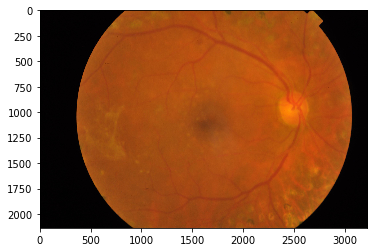

In [15]:
# from PIL import Image

# img = Image.open(df['path'][1])
# width, height = img.size
# print(width, height)
# img.show()
# plt.imshow(np.asarray(img))

In [9]:
# len_df = len(df)
# print(f"There are {len_df} image")

There are 3662 image


### EDA (Explanatory Data Analysis)

Text(0.5, 1.0, 'Samples Per Class')

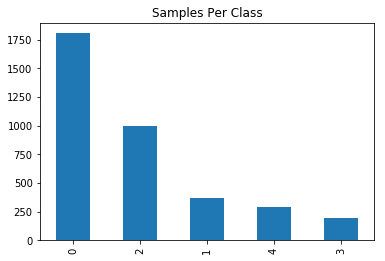

In [20]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Samples Per Class')


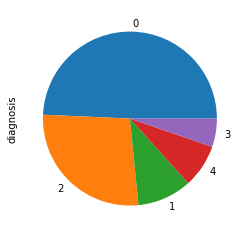

In [23]:
df['diagnosis'].value_counts().plot(kind='pie')

In [30]:
print("Training set has {} samples and {} classes.".format(df.shape[0],df.shape[1]))
print("Testing set has {} samples and {} classes.".format(df_test.shape[0],df_test.shape[1]))

Training set has 3662 samples and 3 classes.
Testing set has 1928 samples and 1 classes.


In [32]:
NUM_CLASSES = df['diagnosis'].nunique()
print(NUM_CLASSES)

5


In [33]:
df.head()

,id_code,diagnosis,path
0,000c1434d8d7,2,./input/train_images\000c1434d8d7.png
1,001639a390f0,4,./input/train_images\001639a390f0.png
2,0024cdab0c1e,1,./input/train_images\0024cdab0c1e.png
3,002c21358ce6,0,./input/train_images\002c21358ce6.png
4,005b95c28852,0,./input/train_images\005b95c28852.png


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
path         3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [35]:
df['diagnosis']=df['diagnosis'].astype('str')

In [36]:
df['diagnosis'].astype('str').dtypes

dtype('O')

In [37]:
df['id_file'] = df['id_code'] + '.png'

In [38]:
df.head()

,id_code,diagnosis,path,id_file
0,000c1434d8d7,2,./input/train_images\000c1434d8d7.png,000c1434d8d7.png
1,001639a390f0,4,./input/train_images\001639a390f0.png,001639a390f0.png
2,0024cdab0c1e,1,./input/train_images\0024cdab0c1e.png,0024cdab0c1e.png
3,002c21358ce6,0,./input/train_images\002c21358ce6.png,002c21358ce6.png
4,005b95c28852,0,./input/train_images\005b95c28852.png,005b95c28852.png


In [39]:
TRAINING_DIR = ".\\input\\train_images\\"
os.listdir(TRAINING_DIR)

['000c1434d8d7.png',
 '001639a390f0.png',
 '0024cdab0c1e.png',
 '002c21358ce6.png',
 '005b95c28852.png',
 '0083ee8054ee.png',
 '0097f532ac9f.png',
 '00a8624548a9.png',
 '00b74780d31d.png',
 '00cb6555d108.png',
 '00cc2b75cddd.png',
 '00e4ddff966a.png',
 '00f6c1be5a33.png',
 '0104b032c141.png',
 '0124dffecf29.png',
 '0125fbd2e791.png',
 '012a242ac6ff.png',
 '014508ccb9cb.png',
 '0151781fe50b.png',
 '0161338f53cc.png',
 '0180bfa26c0b.png',
 '0182152c50de.png',
 '01b3aed3ed4c.png',
 '01c7808d901d.png',
 '01d9477b1171.png',
 '01eb826f6467.png',
 '01f7bb8be950.png',
 '0212dd31f623.png',
 '022f820027b8.png',
 '0231642cf1c2.png',
 '0232dfea7547.png',
 '02358b47ea89.png',
 '0243404e8a00.png',
 '025a169a0bb0.png',
 '02685f13cefd.png',
 '026dcd9af143.png',
 '02cd34a85b24.png',
 '02da652c74b8.png',
 '02dda30d3acf.png',
 '0304bedad8fe.png',
 '0318598cfd16.png',
 '032d7b0b4bf6.png',
 '033f2b43de6d.png',
 '034cb07a550f.png',
 '03676c71ed1b.png',
 '0369f3efe69b.png',
 '03747397839f.png',
 '03a7f4a5786

In [40]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



batch_size = 64
img_height, img_width = 128, 128
nb_epochs = 2

TRAINING_DIR = ".\\input\\train_images\\"
# train_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	  rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

# validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = training_datagen.flow_from_directory(
# 	TRAINING_DIR,
# 	target_size=(512,512),
# 	class_mode='categorical'
# )

# validation_generator = validation_datagen.flow_from_directory(
# 	VALIDATION_DIR,
# 	target_size=(512,512),
# 	class_mode='categorical'
# )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    #batch_size=batch_size,
    #class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(img_height, img_width),
    #batch_size=batch_size,
    #class_mode='categorical',
    subset='validation') # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = 10,#train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = 10,#validation_generator.samples // batch_size,
#     epochs = nb_epochs)

#history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

#model.save("rps.h5")

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [41]:
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

Found 0 images belonging to 0 classes.


In [142]:
nb_classes = 5
diagnosis_classes = list(map(str, range(nb_classes)))
batch_size = 128
img_size = 128
nb_epochs = 5

In [43]:
%%time

train_datagen=ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.25,
    horizontal_flip = True,    
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3
    )
train_generator=train_datagen.flow_from_dataframe(
    dataframe=df,
    directory="./input/train_images/",
    x_col="id_file",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=diagnosis_classes,
    target_size=(img_size,img_size),
    subset='training')

valid_generator=train_datagen.flow_from_dataframe(
    dataframe=df,
    directory="./input/train_images",
    x_col="id_file",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical", 
    classes=diagnosis_classes,
    target_size=(img_size,img_size),
    subset='validation')



Found 2747 validated image filenames belonging to 5 classes.
Found 915 validated image filenames belonging to 5 classes.
Wall time: 436 ms


In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
#from keras.optimizers import rmsprop
from keras import optimizers, applications

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizers.rmsprop(
            lr=0.0001),
            loss="categorical_crossentropy", 
            metrics=["accuracy"])



In [96]:
from keras import applications

resnet50 = applications.ResNet50(weights=None, 
                          include_top=False, 
                          input_shape=(img_size, img_size, 3))
resnet50.load_weights('./input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

resnet50.trainable = False
resnet50.summary()


C:\Users\jaehy\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [140]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
#from keras.optimizers import rmsprop
from keras import optimizers, applications

x=Flatten()(resnet50.output)
x=Dropout(0.4)(x)
x=Dense(1024, activation='relu')(x)
x=Dropout(0.4)(x)
x=Dense(512, activation='relu')(x)
#x=Dropout(0.2)(x)
#x=BatchNormalization()(x)
predictions = Dense(nb_classes,activation='softmax', name="Output_Layer")(x)

resnet = Model(inputs=resnet50.input, outputs=predictions)


In [143]:
resnet.compile(optimizers.rmsprop(
            lr=0.0001),
            loss="categorical_crossentropy", 
            metrics=["accuracy"])

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential(resnet50.layers)

model.add(Flatten())
# fully connected layer
model.add(Dense(2048, activation='relu'))

model.add(Dropout(0.5))
# Softmax
model.add(Dense(1, activation='softmax'))





ValueError: Input 0 is incompatible with layer res2a_branch1: expected axis -1 of input shape to have value 64 but got shape (None, 32, 32, 256)

In [144]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [114]:
%%time
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

resnet.fit_generator(generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    verbose=1,                    
    epochs=10)

Epoch 1/20
85/85 [==============================] - 265s 3s/step - loss: 1.2240 - acc: 0.6444 - val_loss: 1.3309 - val_acc: 0.6387
Epoch 2/20
85/85 [==============================] - 235s 3s/step - loss: 0.7597 - acc: 0.7249 - val_loss: 1.3819 - val_acc: 0.7101
Epoch 3/20
85/85 [==============================] - 234s 3s/step - loss: 0.7082 - acc: 0.7396 - val_loss: 2.1384 - val_acc: 0.6772
Epoch 4/20
85/85 [==============================] - 233s 3s/step - loss: 0.6702 - acc: 0.7691 - val_loss: 3.0488 - val_acc: 0.6183
Epoch 5/20
85/85 [==============================] - 230s 3s/step - loss: 0.6195 - acc: 0.7753 - val_loss: 2.9419 - val_acc: 0.6059
Epoch 6/20
85/85 [==============================] - 233s 3s/step - loss: 0.6362 - acc: 0.7713 - val_loss: 2.0774 - val_acc: 0.6886
Epoch 7/20
85/85 [==============================] - 230s 3s/step - loss: 0.5992 - acc: 0.7928 - val_loss: 1.0256 - val_acc: 0.7599
Epoch 8/20
85/85 [==============================] - 234s 3s/step - loss: 0.6093 - a

In [137]:
model.save('./MODEL/190729_resnet50_1st.h5')


In [138]:
%%time
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

resnet.fit_generator(generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    verbose=1,                    
    epochs=30)

Epoch 1/30
85/85 [==============================] - 270s 3s/step - loss: 0.4249 - acc: 0.8483 - val_loss: 1.0328 - val_acc: 0.7656
Epoch 2/30
17/85 [=====>........................] - ETA: 1:03 - loss: 0.4050 - acc: 0.8603

KeyboardInterrupt: 

In [145]:
%%time
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

resnet.fit_generator(generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    verbose=1,                    
    epochs=10)

Epoch 1/10
85/85 [==============================] - 265s 3s/step - loss: 0.6090 - acc: 0.7770 - val_loss: 0.9382 - val_acc: 0.7146
Epoch 2/10
85/85 [==============================] - 235s 3s/step - loss: 0.4454 - acc: 0.8387 - val_loss: 0.8049 - val_acc: 0.7678
Epoch 3/10
85/85 [==============================] - 232s 3s/step - loss: 0.4403 - acc: 0.8411 - val_loss: 1.5349 - val_acc: 0.7531
Epoch 4/10
85/85 [==============================] - 237s 3s/step - loss: 0.4398 - acc: 0.8459 - val_loss: 1.2286 - val_acc: 0.7508
Epoch 5/10
85/85 [==============================] - 230s 3s/step - loss: 0.3612 - acc: 0.8700 - val_loss: 1.0052 - val_acc: 0.7746
Epoch 6/10
85/85 [==============================] - 232s 3s/step - loss: 0.4162 - acc: 0.8557 - val_loss: 1.4593 - val_acc: 0.7565
Epoch 7/10
85/85 [==============================] - 233s 3s/step - loss: 0.3770 - acc: 0.8649 - val_loss: 1.4038 - val_acc: 0.7848
Epoch 8/10
85/85 [==============================] - 231s 3s/step - loss: 0.3853 - a

In [146]:
%%time
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

resnet.fit_generator(generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    verbose=1,                    
    epochs=10)

Epoch 1/10
85/85 [==============================] - 262s 3s/step - loss: 0.3447 - acc: 0.8741 - val_loss: 1.1534 - val_acc: 0.7690
Epoch 2/10
85/85 [==============================] - 233s 3s/step - loss: 0.3578 - acc: 0.8775 - val_loss: 1.3752 - val_acc: 0.7508
Epoch 3/10
85/85 [==============================] - 236s 3s/step - loss: 0.3534 - acc: 0.8820 - val_loss: 1.7670 - val_acc: 0.7203
Epoch 4/10
85/85 [==============================] - 234s 3s/step - loss: 0.3604 - acc: 0.8736 - val_loss: 1.8610 - val_acc: 0.7055
Epoch 5/10
85/85 [==============================] - 238s 3s/step - loss: 0.3285 - acc: 0.8860 - val_loss: 1.2892 - val_acc: 0.7656
Epoch 6/10
85/85 [==============================] - 233s 3s/step - loss: 0.3417 - acc: 0.8891 - val_loss: 1.7614 - val_acc: 0.7780
Epoch 7/10
85/85 [==============================] - 236s 3s/step - loss: 0.3191 - acc: 0.8946 - val_loss: 0.9921 - val_acc: 0.7871
Epoch 8/10
85/85 [==============================] - 237s 3s/step - loss: 0.3253 - a

In [48]:
from keras.models import load_model
model = load_model('./MODEL/190728_simple_CNN.h5')

## SAMPLE SUBMISSION

In [123]:
sample_df = pd.read_csv('./input/sample_submission.csv')
sample_df['id_file'] = sample_df['id_code'] + '.png'

In [124]:
print(sample_df.head())
print(sample_df.shape)

        id_code  diagnosis           id_file
0  0005cfc8afb6          0  0005cfc8afb6.png
1  003f0afdcd15          0  003f0afdcd15.png
2  006efc72b638          0  006efc72b638.png
3  00836aaacf06          0  00836aaacf06.png
4  009245722fa4          0  009245722fa4.png
(1928, 3)


In [125]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(  
        dataframe = sample_df,
        directory = "./input/test_images",    
        x_col="id_file",
        target_size = (img_size,img_size),
        batch_size = 1,
        shuffle = False,
        class_mode = None
        )

Found 1928 validated image filenames.


In [130]:
test_generator.filenames

['0005cfc8afb6.png',
 '003f0afdcd15.png',
 '006efc72b638.png',
 '00836aaacf06.png',
 '009245722fa4.png',
 '009c019a7309.png',
 '010d915e229a.png',
 '0111b949947e.png',
 '01499815e469.png',
 '0167076e7089.png',
 '01c31b10ab99.png',
 '01c5ba195207.png',
 '01e4d86b3a30.png',
 '020921b796d5.png',
 '020f6983114d.png',
 '021c207614d6.png',
 '0229c0a80d42.png',
 '024d0a225db1.png',
 '0268f4382c67.png',
 '0299d97f31f7.png',
 '03042a663e54.png',
 '030e06ddbb04.png',
 '033cdbbbdfaa.png',
 '03be80919be4.png',
 '03eaa4eef484.png',
 '0434995d0654.png',
 '04a0773c71fb.png',
 '04e1b77ef107.png',
 '051d9d12a6ee.png',
 '052e00f47cfa.png',
 '06035cfbcc18.png',
 '061e7dab2b76.png',
 '0622a0f615db.png',
 '062ed40f5272.png',
 '0654cdd3c01a.png',
 '065cb18bb0b2.png',
 '069037e82135.png',
 '069ebdb1023d.png',
 '06cdd3f3f262.png',
 '06daa7390238.png',
 '06e60df1823e.png',
 '0737dfb0a164.png',
 '0749255f718d.png',
 '07685fac659a.png',
 '079e029f3b2e.png',
 '07d8d154e752.png',
 '081c7ec32f27.png',
 '082c7ccb536

In [131]:
%%time
predict = resnet.predict_generator(test_generator, steps = len(test_generator.filenames))

Wall time: 50.7 s


In [132]:
predict.shape

(1928, 5)

5

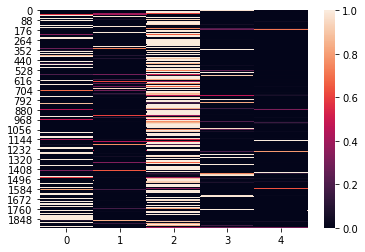

In [133]:
import seaborn as sns
sns.heatmap(predict)
temp = np.argmax(predict, axis=1)
pd.Series(temp).nunique()






In [135]:
pd.Series(temp).value_counts()

2    1217
0     515
3      98
1      68
4      30
dtype: int64

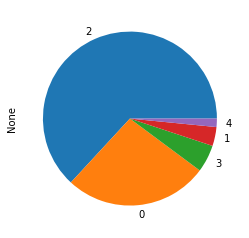

In [136]:
pd.Series(temp).value_counts().plot(kind='pie')

In [82]:
predicted_class_indices = np.argmax(predict, axis=1)
np.unique(predicted_class_indices)

array([0, 2], dtype=int64)

In [83]:
test_generator.filenames

['0005cfc8afb6.png',
 '003f0afdcd15.png',
 '006efc72b638.png',
 '00836aaacf06.png',
 '009245722fa4.png',
 '009c019a7309.png',
 '010d915e229a.png',
 '0111b949947e.png',
 '01499815e469.png',
 '0167076e7089.png',
 '01c31b10ab99.png',
 '01c5ba195207.png',
 '01e4d86b3a30.png',
 '020921b796d5.png',
 '020f6983114d.png',
 '021c207614d6.png',
 '0229c0a80d42.png',
 '024d0a225db1.png',
 '0268f4382c67.png',
 '0299d97f31f7.png',
 '03042a663e54.png',
 '030e06ddbb04.png',
 '033cdbbbdfaa.png',
 '03be80919be4.png',
 '03eaa4eef484.png',
 '0434995d0654.png',
 '04a0773c71fb.png',
 '04e1b77ef107.png',
 '051d9d12a6ee.png',
 '052e00f47cfa.png',
 '06035cfbcc18.png',
 '061e7dab2b76.png',
 '0622a0f615db.png',
 '062ed40f5272.png',
 '0654cdd3c01a.png',
 '065cb18bb0b2.png',
 '069037e82135.png',
 '069ebdb1023d.png',
 '06cdd3f3f262.png',
 '06daa7390238.png',
 '06e60df1823e.png',
 '0737dfb0a164.png',
 '0749255f718d.png',
 '07685fac659a.png',
 '079e029f3b2e.png',
 '07d8d154e752.png',
 '081c7ec32f27.png',
 '082c7ccb536

In [84]:
filenames=test_generator.filenames
results=pd.DataFrame({"id_code":filenames,
                      "diagnosis":np.argmax(predict,axis=1)})
results['id_code'] = results['id_code'].map(lambda x: str(x)[:-4])
results.to_csv("submission.csv",index=False)

In [67]:
del model
import gc
gc.collect()

251761

In [68]:
keras.backend.clear_session()

In [ ]:
validation_generator

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [19]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 
gen = ImageDataGenerator(
        rescale=1/255.,
        rotation_range=90.,
        width_shift_range=1.,
        height_shift_range=.5,
        shear_range=.8,
        zoom_range=.5,
        horizontal_flip=True,
        vertical_flip=True
)

x_train_batch, y_train_batch = next(gen)

print('shape of x_train_batch:', x_train_batch.shape)
print('shape of y_train_batch:', y_train_batch.shape)

TypeError: 'ImageDataGenerator' object is not an iterator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

NameError: name 'train_data_dir' is not defined

In [32]:
len(train_generator)

0